In [24]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import calendar
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
from kneed import KneeLocator

#### Start with the most basic: beta. Explore the implications of the concentration of the seven in the S&P 500 (which is often used as the proxy for the market). How much of the beta is driven by the seven verses the 493 other stocks (i.e. they probably have different betas – think three)?

In [2]:
# Load Mag7 data
ms_df = pd.read_csv("Data/bbg_data.csv", index_col=0)

ms_df

,AAPL_price,AAPL_mcap,AAPL_return,AMZN_price,AMZN_mcap,AMZN_return,GOOGL_price,GOOGL_mcap,GOOGL_return,META_price,...,NVDA_return,TSLA_price,TSLA_mcap,TSLA_return,SPX_price,SPX_mcap,SPX_return,GOOG_price,GOOG_mcap,GOOG_return
2015-01-01,27.595,6.473610e+05,-1.9019,15.518,1.436940e+05,0.0161,26.533,3.584205e+05,-0.8631,78.02,...,-1.5709,14.8273,2.788617e+04,0.0810,2058.90,18845822.34,-1.03,26.248,3.584205e+05,-0.7579
2015-01-02,27.333,6.412029e+05,-0.9513,15.426,1.428467e+05,-0.5897,26.478,3.574916e+05,-0.2092,78.45,...,0.3990,14.6207,2.749748e+04,-1.3938,2058.20,18840128.85,-0.03,26.169,3.574916e+05,-0.3021
2015-01-05,26.563,6.231392e+05,-2.8172,15.110,1.399159e+05,-2.0517,25.973,3.503354e+05,-1.9054,77.19,...,-1.6890,14.0060,2.634146e+04,-4.2041,2020.58,18497686.83,-1.83,25.623,3.503354e+05,-2.0846
2015-01-06,26.565,6.231979e+05,0.0094,14.765,1.367212e+05,-2.2833,25.332,3.419722e+05,-2.4679,76.15,...,-3.0318,14.0853,2.649067e+04,0.5664,2002.61,18333610.15,-0.89,25.029,3.419722e+05,-2.3177
2015-01-07,26.938,6.319365e+05,1.4022,14.921,1.381704e+05,1.0600,25.258,3.411923e+05,-0.2941,76.15,...,-0.2866,14.0633,2.644929e+04,-0.1562,2025.90,18549992.79,1.16,24.986,3.411923e+05,-0.1713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,223.660,3.363371e+06,-0.0760,235.420,2.475444e+06,0.1745,197.980,2.433019e+06,-0.1966,636.45,...,0.1020,412.3800,1.323764e+06,-0.6577,6118.71,53943854.69,0.53,199.580,2.433019e+06,-0.2250
2025-01-24,222.780,3.350138e+06,-0.3935,234.850,2.469450e+06,-0.2421,200.210,2.460853e+06,1.1264,647.49,...,-3.1246,406.5800,1.305146e+06,-1.4065,6101.24,53800552.64,-0.29,201.900,2.460853e+06,1.1624
2025-01-27,229.860,3.456606e+06,3.1780,235.420,2.475444e+06,0.2427,191.810,2.359640e+06,-4.1956,659.88,...,-16.9682,397.1500,1.274875e+06,-2.3193,6012.28,53016057.50,-1.46,193.770,2.359640e+06,-4.0267
2025-01-28,238.260,3.582924e+06,3.6544,238.150,2.504150e+06,1.1596,195.300,2.401227e+06,1.8195,674.33,...,8.9259,398.0900,1.277893e+06,0.2367,6067.70,53490109.97,0.92,197.070,2.401227e+06,1.7031


In [3]:
# Creating side dataframe only for returns
ms_tickers = ["AAPL", "AMZN", "GOOGL", "GOOG", "META", "MSFT", "NVDA", "TSLA", "SPX"]
ms_ret_tickers = [f"{ticker}_return" for ticker in ms_tickers]
ms_ret_df = ms_df[ms_ret_tickers].copy()
ms_ret_df.reset_index(drop=True, inplace=True)

ms_ret_df

,AAPL_return,AMZN_return,GOOGL_return,GOOG_return,META_return,MSFT_return,NVDA_return,TSLA_return,SPX_return
0,-1.9019,0.0161,-0.8631,-0.7579,-1.5148,-1.2123,-1.5709,0.0810,-1.03
1,-0.9513,-0.5897,-0.2092,-0.3021,0.5511,0.6674,0.3990,-1.3938,-0.03
2,-2.8172,-2.0517,-1.9054,-2.0846,-1.6061,-0.9303,-1.6890,-4.2041,-1.83
3,0.0094,-2.2833,-2.4679,-2.3177,-1.3473,-1.4571,-3.0318,0.5664,-0.89
4,1.4022,1.0600,-0.2941,-0.1713,0.0000,1.2705,-0.2866,-0.1562,1.16
...,...,...,...,...,...,...,...,...,...
2625,-0.0760,0.1745,-0.1966,-0.2250,2.0770,0.1143,0.1020,-0.6577,0.53
2626,-0.3935,-0.2421,1.1264,1.1624,1.7346,-0.5932,-3.1246,-1.4065,-0.29
2627,3.1780,0.2427,-4.1956,-4.0267,1.9135,-2.1394,-16.9682,-2.3193,-1.46
2628,3.6544,1.1596,1.8195,1.7031,2.1898,2.9087,8.9259,0.2367,0.92


In [4]:
# Calculating rolling window beta for Mag7 from 2015-2025
ms_betas = {ticker: [] for ticker in ms_tickers}

# 1-year rolling window (approx)
window_size = 252   

for row in ms_ret_df.itertuples():
    if row.Index < window_size:
        for ticker in ms_tickers:
            ms_betas[ticker].append(np.nan)
        continue

    beta_df = ms_ret_df[row.Index - window_size:row.Index + 1]
    cov_vector = beta_df.cov()["SPX_return"]
    cov_vector /= cov_vector["SPX_return"]

    for ticker, beta in cov_vector.items():
        ms_betas[ticker[:-7]].append(beta)


for ticker, beta_ts in ms_betas.items():
    ms_df[f"{ticker}_beta"] = beta_ts

ms_df

,AAPL_price,AAPL_mcap,AAPL_return,AMZN_price,AMZN_mcap,AMZN_return,GOOGL_price,GOOGL_mcap,GOOGL_return,META_price,...,GOOG_return,AAPL_beta,AMZN_beta,GOOGL_beta,GOOG_beta,META_beta,MSFT_beta,NVDA_beta,TSLA_beta,SPX_beta
2015-01-01,27.595,6.473610e+05,-1.9019,15.518,1.436940e+05,0.0161,26.533,3.584205e+05,-0.8631,78.02,...,-0.7579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,27.333,6.412029e+05,-0.9513,15.426,1.428467e+05,-0.5897,26.478,3.574916e+05,-0.2092,78.45,...,-0.3021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,26.563,6.231392e+05,-2.8172,15.110,1.399159e+05,-2.0517,25.973,3.503354e+05,-1.9054,77.19,...,-2.0846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,26.565,6.231979e+05,0.0094,14.765,1.367212e+05,-2.2833,25.332,3.419722e+05,-2.4679,76.15,...,-2.3177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,26.938,6.319365e+05,1.4022,14.921,1.381704e+05,1.0600,25.258,3.411923e+05,-0.2941,76.15,...,-0.1713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,223.660,3.363371e+06,-0.0760,235.420,2.475444e+06,0.1745,197.980,2.433019e+06,-0.1966,636.45,...,-0.2250,0.915099,1.504005,1.175511,1.176837,1.386592,1.168182,2.696162,2.603316,1.0
2025-01-24,222.780,3.350138e+06,-0.3935,234.850,2.469450e+06,-0.2421,200.210,2.460853e+06,1.1264,647.49,...,1.1624,0.914841,1.504388,1.172046,1.173255,1.382531,1.168827,2.703979,2.604201,1.0
2025-01-27,229.860,3.456606e+06,3.1780,235.420,2.475444e+06,0.2427,191.810,2.359640e+06,-4.1956,659.88,...,-4.0267,0.875086,1.483369,1.195727,1.195895,1.336016,1.166864,2.826309,2.596389,1.0
2025-01-28,238.260,3.582924e+06,3.6544,238.150,2.504150e+06,1.1596,195.300,2.401227e+06,1.8195,674.33,...,1.7031,0.889200,1.482114,1.199288,1.198885,1.340733,1.176434,2.857540,2.584734,1.0


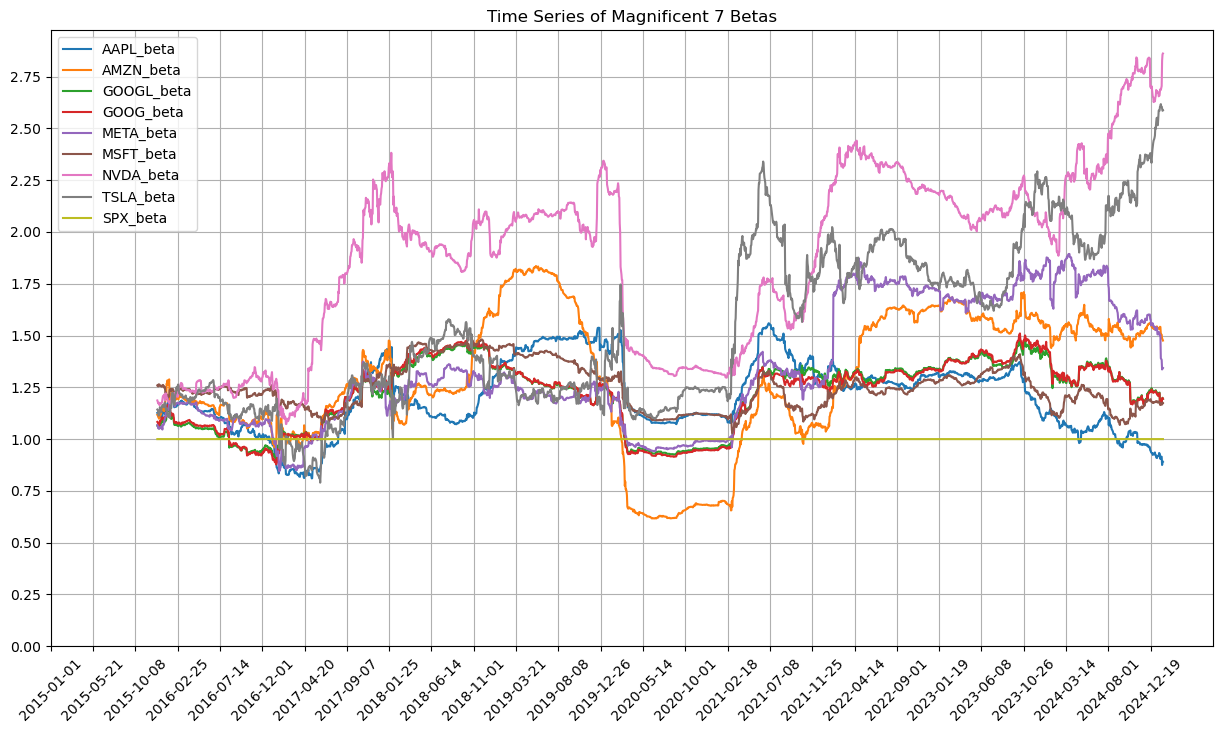

In [13]:
# Plotting beta time-series of Mag7 securities
plotting_df = ms_df[[f"{ticker}_beta" for ticker in ms_tickers]]

plt.figure(figsize=(15, 8))

for column in plotting_df.columns:
    plt.plot(plotting_df.index, beta_df[column], label=column)

plt.title("Time Series of Magnificent 7 Betas")
plt.xticks(plotting_df.index[::100], rotation=45)
plt.yticks([i/4 for i in range(12)])
plt.grid()
plt.legend();

Beta has been varying pretty wildly over the past few years, so changes in risk contributions may not only be due to weight changes, but also due to temporal variations in beta.

##### ACTUAL SPX WEIGHTING METHODOLOGY (from their methodology document)
Weighting. Each index is capped market capitalization weighted. For capping purposes, the indices
rebalance quarterly after the close of business on the third Friday of March, June, September, and
December using the following procedures:
1. The rebalancing reference date is the Wednesday prior to the second Friday of March, June,
September, and December.
2. With prices reflected on the rebalancing reference date, adjusted for any applicable corporate
actions, and membership, shares outstanding and IWFs as of the rebalancing effective date,
each company is FMC weighted.
3. If any company has an FMC weight greater than 24%, the cap all companies’ weight at 23%,
which allows for a 2% buffer.
2 GICS sub-industry indices calculate for the Energy Select Sector Index. Constituents’ weight adjustment factors flow through from
the underlying index.
3 S&P Dow Jones Indices created back calculated history for the Communication Services Select Sector Index based on the
securities in the headline S&P 500 that would have hypothetically been classified as GICS Code 50 under this new structure
effective September 24, 2018.
S&P Dow Jones Indices: S&P U.S. Indices Methodology 15
4. The sum of the companies with weights greater than 4.8% cannot exceed 50% of the total index
weight. These caps are set to allow for a buffer below the 5% limit.
5. If the rule in Step 4 is breached, set the weight of companies greater than 4.8% equal to:
𝑊 𝑖
𝐶𝑎𝑝𝑝𝑒𝑑 = max (45% × 𝑊 𝑖
∑ 𝑁
𝑖 𝑊 𝑖
, 4.5%)
where:
N = total number of companies with index weights over 4.8%, after checking the single
company cap
Wi = index weight of the N companies with individual company weights over 4.8%, after
checking the single company cap
Set 4.5% and 45% caps to allow for a buffer below the 5% limit
6. Proportionally redistribute the excess weight from Steps 3 to 5 to companies with an initial weight
less than 4.8%, setting a 4.5% upper bound on the companies’ index weight.
7. Assign index share amounts to each constituent to arrive at the weights calculated above. Since
index shares are assigned based on prices one week prior to rebalancing, the actual weight of
each constituent at the rebalancing differs somewhat from these weights due to market
movements.

In [9]:
# Just loosely checking to see if any of the main conditions are breached
for ticker in ms_tickers:
    ms_df[f"{ticker}_weight"] = ms_df[f"{ticker}_mcap"] / ms_df["SPX_mcap"]
    print(ms_df[f"{ticker}_weight"].describe())

count    2630.000000
mean        0.050878
std         0.016098
min         0.026489
25%         0.035946
50%         0.047705
75%         0.067258
max         0.078635
Name: AAPL_weight, dtype: float64
count    2630.000000
mean        0.032144
std         0.011745
min         0.007233
25%         0.021273
50%         0.034433
75%         0.040493
max         0.058253
Name: AMZN_weight, dtype: float64
count    2630.000000
mean        0.034989
std         0.007441
min         0.018044
25%         0.029714
50%         0.034290
75%         0.041423
max         0.048767
Name: GOOGL_weight, dtype: float64
count    2630.000000
mean        0.034989
std         0.007441
min         0.018044
25%         0.029714
50%         0.034290
75%         0.041423
max         0.048767
Name: GOOG_weight, dtype: float64
count    2630.000000
mean        0.019980
std         0.004855
min         0.007246
25%         0.016989
50%         0.020466
75%         0.022891
max         0.031840
Name: META_weight, dtyp

Don't think any cap will get breached, so will just do loose weight calculations: Update on 3rd Friday of March, June, September, December using weights from Wednesday the week of the previous Friday

In [11]:
# Get Key Dates
update_dates = set()
ref_dates = set()

for year in range(2015, 2026):
    for month in [3, 6, 9, 12]:
        first_day = date(year, month, 1)
        first_fri = first_day + timedelta(days=(calendar.FRIDAY - first_day.weekday() + 7) % 7)
        third_fri = first_fri + timedelta(weeks=2)
        second_wed = third_fri - timedelta(weeks=1, days=2)
        update_dates.add(third_fri.strftime("%Y-%m-%d")) 
        ref_dates.add(second_wed.strftime("%Y-%m-%d")) 

ref_dates

{'2015-03-11',
 '2015-06-10',
 '2015-09-09',
 '2015-12-09',
 '2016-03-09',
 '2016-06-08',
 '2016-09-07',
 '2016-12-07',
 '2017-03-08',
 '2017-06-07',
 '2017-09-06',
 '2017-12-06',
 '2018-03-07',
 '2018-06-06',
 '2018-09-12',
 '2018-12-12',
 '2019-03-06',
 '2019-06-12',
 '2019-09-11',
 '2019-12-11',
 '2020-03-11',
 '2020-06-10',
 '2020-09-09',
 '2020-12-09',
 '2021-03-10',
 '2021-06-09',
 '2021-09-08',
 '2021-12-08',
 '2022-03-09',
 '2022-06-08',
 '2022-09-07',
 '2022-12-07',
 '2023-03-08',
 '2023-06-07',
 '2023-09-06',
 '2023-12-06',
 '2024-03-06',
 '2024-06-12',
 '2024-09-11',
 '2024-12-11',
 '2025-03-12',
 '2025-06-11',
 '2025-09-10',
 '2025-12-10'}

In [14]:
# Calculating risk contributions for Mag7 from 2015-2025
ms_risks = {ticker: [] for ticker in ms_tickers}

existing_weights = {ticker: ms_df.iloc[0][f"{ticker}_weight"] for ticker in ms_tickers}
temp_weights = {ticker: 0 for ticker in ms_tickers}
for row in ms_df.itertuples():
    if row.Index in ref_dates:
        for ticker in ms_tickers:
            temp_weights[ticker] = getattr(row, f"{ticker}_weight")

    if row.Index in update_dates:
        existing_weights = temp_weights

    for ticker in ms_tickers:
        ms_risks[ticker].append(existing_weights[ticker] * getattr(row, f"{ticker}_beta"))


for ticker, risk_ts in ms_risks.items():
    ms_df[f"{ticker}_risk"] = risk_ts

ms_only = ["AAPL", "AMZN", "GOOGL", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
ms_df["M7_risk"] = ms_df[[f"{ticker}_risk" for ticker in ms_only]].sum(axis=1)
ms_df["OTHER_risk"] = 1 - ms_df["M7_risk"]

ms_df

,AAPL_price,AAPL_mcap,AAPL_return,AMZN_price,AMZN_mcap,AMZN_return,GOOGL_price,GOOGL_mcap,GOOGL_return,META_price,...,AMZN_risk,GOOGL_risk,GOOG_risk,META_risk,MSFT_risk,NVDA_risk,TSLA_risk,SPX_risk,M7_risk,OTHER_risk
2015-01-01,27.595,6.473610e+05,-1.9019,15.518,1.436940e+05,0.0161,26.533,3.584205e+05,-0.8631,78.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
2015-01-02,27.333,6.412029e+05,-0.9513,15.426,1.428467e+05,-0.5897,26.478,3.574916e+05,-0.2092,78.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
2015-01-05,26.563,6.231392e+05,-2.8172,15.110,1.399159e+05,-2.0517,25.973,3.503354e+05,-1.9054,77.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
2015-01-06,26.565,6.231979e+05,0.0094,14.765,1.367212e+05,-2.2833,25.332,3.419722e+05,-2.4679,76.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
2015-01-07,26.938,6.319365e+05,1.4022,14.921,1.381704e+05,1.0600,25.258,3.411923e+05,-0.2941,76.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,223.660,3.363371e+06,-0.0760,235.420,2.475444e+06,0.1745,197.980,2.433019e+06,-0.1966,636.45,...,0.068022,0.052693,0.052753,0.041384,0.072844,0.171825,0.066308,1.0,0.589518,0.410482
2025-01-24,222.780,3.350138e+06,-0.3935,234.850,2.469450e+06,-0.2421,200.210,2.460853e+06,1.1264,647.49,...,0.068039,0.052538,0.052592,0.041263,0.072884,0.172323,0.066330,1.0,0.589641,0.410359
2025-01-27,229.860,3.456606e+06,3.1780,235.420,2.475444e+06,0.2427,191.810,2.359640e+06,-4.1956,659.88,...,0.067088,0.053599,0.053607,0.039874,0.072761,0.180120,0.066131,1.0,0.594086,0.405914
2025-01-28,238.260,3.582924e+06,3.6544,238.150,2.504150e+06,1.1596,195.300,2.401227e+06,1.8195,674.33,...,0.067032,0.053759,0.053741,0.040015,0.073358,0.182110,0.065834,1.0,0.597737,0.402263


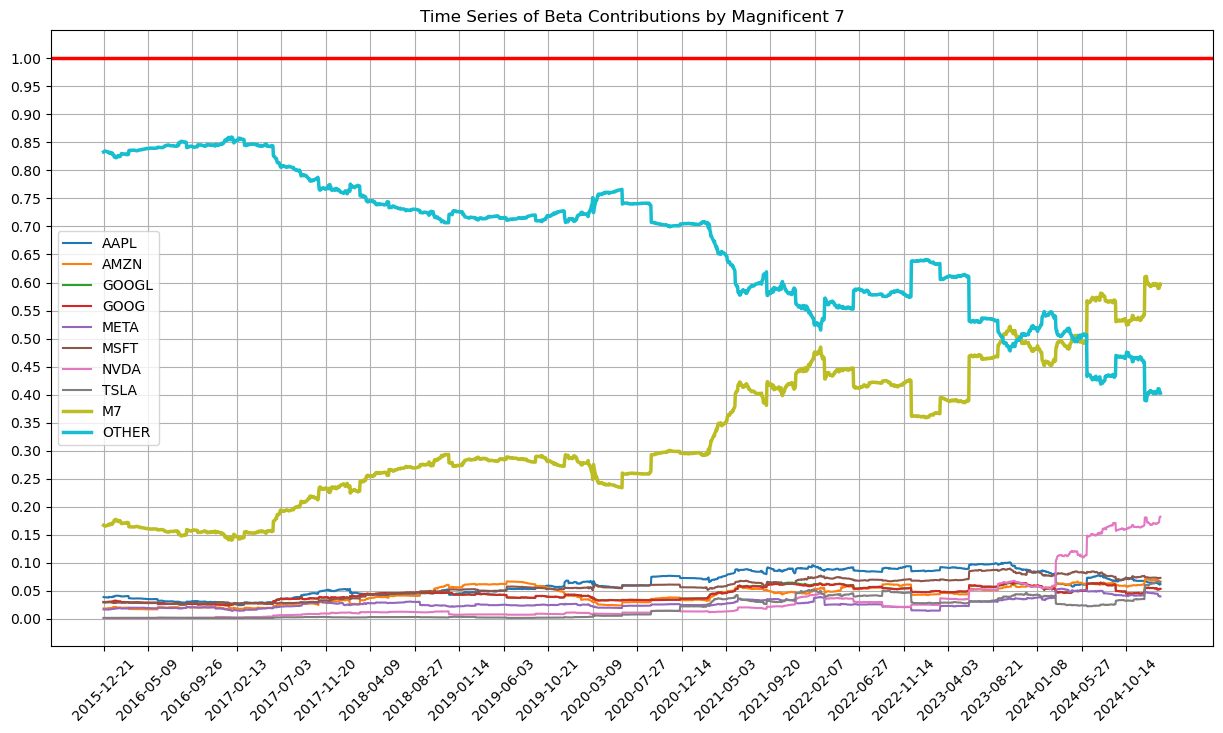

In [17]:
plotting_tickers = ["AAPL", "AMZN", "GOOGL", "GOOG", "META", "MSFT", "NVDA", "TSLA", "M7", "OTHER"]
plotting_df = ms_df[[f"{ticker}_risk" for ticker in plotting_tickers]].dropna()
plotting_df.columns = plotting_tickers

plt.figure(figsize=(15, 8))
for column in plotting_df.columns:
    if column in ["M7", "OTHER"]:
        plt.plot(plotting_df.index, plotting_df[column], label=column, linewidth=2.5)
    else:
        plt.plot(plotting_df.index, plotting_df[column], label=column)
plt.axhline(y=1, color='r', linewidth=2.5)
plt.title("Time Series of Beta Contributions by Magnificent 7")
plt.xticks(plotting_df.index[::100], rotation=45)
plt.yticks([i/20 for i in range(21)])
plt.grid()
plt.legend();

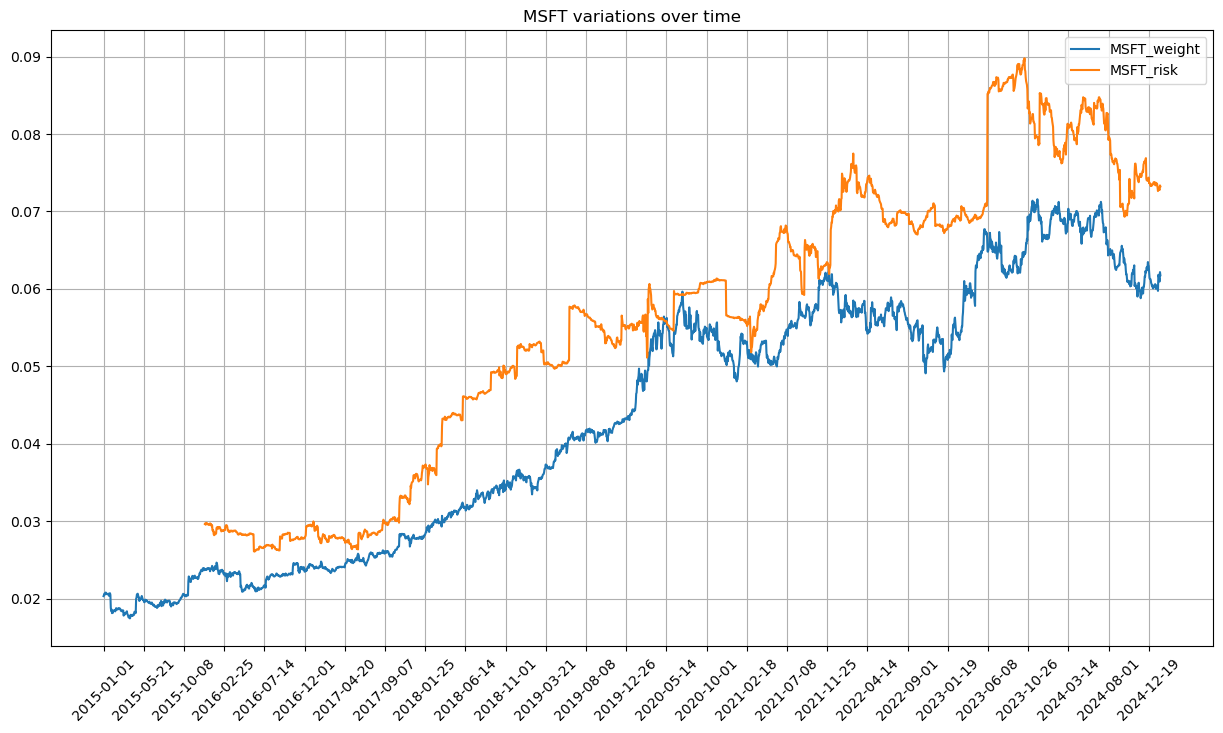

In [18]:
# Analyze how much risk contribution for each individual security is driven by weight changes against beta changes
ticker_of_interest = "MSFT"

plt.figure(figsize=(15, 8))
plt.plot(ms_df.index, ms_df[f"{ticker_of_interest}_weight"], label=f"{ticker_of_interest}_weight")
plt.plot(ms_df.index, ms_df[f"{ticker_of_interest}_risk"], label=f"{ticker_of_interest}_risk")
plt.xticks(ms_df.index[::100], rotation=45)
plt.title(f"{ticker_of_interest} variations over time")
plt.grid()
plt.legend();

Changes in risk contributions seem to be at least partially determined by weight changes of the security within SPX, though some less so than others. To be safe, I try to verify that overall risk contribution changes are mostly driven by concentration changes by holding betas constant past a certain date

In [19]:
# Add on weight columns as assigned by rebalance mechanism
ms_i_weights = {ticker: [] for ticker in ms_only}

existing_weights = {ticker: ms_df.iloc[0][f"{ticker}_weight"] for ticker in ms_only}
temp_weights = {ticker: 0 for ticker in ms_only}
for row in ms_df.itertuples():
    if row.Index in ref_dates:
        for ticker in ms_only:
            temp_weights[ticker] = getattr(row, f"{ticker}_weight")

    if row.Index in update_dates:
        existing_weights = temp_weights

    for ticker in ms_only:
        ms_i_weights[ticker].append(existing_weights[ticker])


for ticker, i_weight in ms_i_weights.items():
    ms_df[f"{ticker}_i_weight"] = i_weight

ms_df["M7_i_weight"] = ms_df[[f"{ticker}_i_weight" for ticker in ms_only]].sum(axis=1)

ms_df

,AAPL_price,AAPL_mcap,AAPL_return,AMZN_price,AMZN_mcap,AMZN_return,GOOGL_price,GOOGL_mcap,GOOGL_return,META_price,...,OTHER_risk,AAPL_i_weight,AMZN_i_weight,GOOGL_i_weight,GOOG_i_weight,META_i_weight,MSFT_i_weight,NVDA_i_weight,TSLA_i_weight,M7_i_weight
2015-01-01,27.595,6.473610e+05,-1.9019,15.518,1.436940e+05,0.0161,26.533,3.584205e+05,-0.8631,78.02,...,1.000000,0.034350,0.007625,0.019019,0.019019,0.011541,0.020316,0.000578,0.00148,0.113928
2015-01-02,27.333,6.412029e+05,-0.9513,15.426,1.428467e+05,-0.5897,26.478,3.574916e+05,-0.2092,78.45,...,1.000000,0.034350,0.007625,0.019019,0.019019,0.011541,0.020316,0.000578,0.00148,0.113928
2015-01-05,26.563,6.231392e+05,-2.8172,15.110,1.399159e+05,-2.0517,25.973,3.503354e+05,-1.9054,77.19,...,1.000000,0.034350,0.007625,0.019019,0.019019,0.011541,0.020316,0.000578,0.00148,0.113928
2015-01-06,26.565,6.231979e+05,0.0094,14.765,1.367212e+05,-2.2833,25.332,3.419722e+05,-2.4679,76.15,...,1.000000,0.034350,0.007625,0.019019,0.019019,0.011541,0.020316,0.000578,0.00148,0.113928
2015-01-07,26.938,6.319365e+05,1.4022,14.921,1.381704e+05,1.0600,25.258,3.411923e+05,-0.2941,76.15,...,1.000000,0.034350,0.007625,0.019019,0.019019,0.011541,0.020316,0.000578,0.00148,0.113928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,223.660,3.363371e+06,-0.0760,235.420,2.475444e+06,0.1745,197.980,2.433019e+06,-0.1966,636.45,...,0.410482,0.069599,0.045227,0.044826,0.044826,0.029846,0.062356,0.063730,0.02547,0.385880
2025-01-24,222.780,3.350138e+06,-0.3935,234.850,2.469450e+06,-0.2421,200.210,2.460853e+06,1.1264,647.49,...,0.410359,0.069599,0.045227,0.044826,0.044826,0.029846,0.062356,0.063730,0.02547,0.385880
2025-01-27,229.860,3.456606e+06,3.1780,235.420,2.475444e+06,0.2427,191.810,2.359640e+06,-4.1956,659.88,...,0.405914,0.069599,0.045227,0.044826,0.044826,0.029846,0.062356,0.063730,0.02547,0.385880
2025-01-28,238.260,3.582924e+06,3.6544,238.150,2.504150e+06,1.1596,195.300,2.401227e+06,1.8195,674.33,...,0.402263,0.069599,0.045227,0.044826,0.044826,0.029846,0.062356,0.063730,0.02547,0.385880


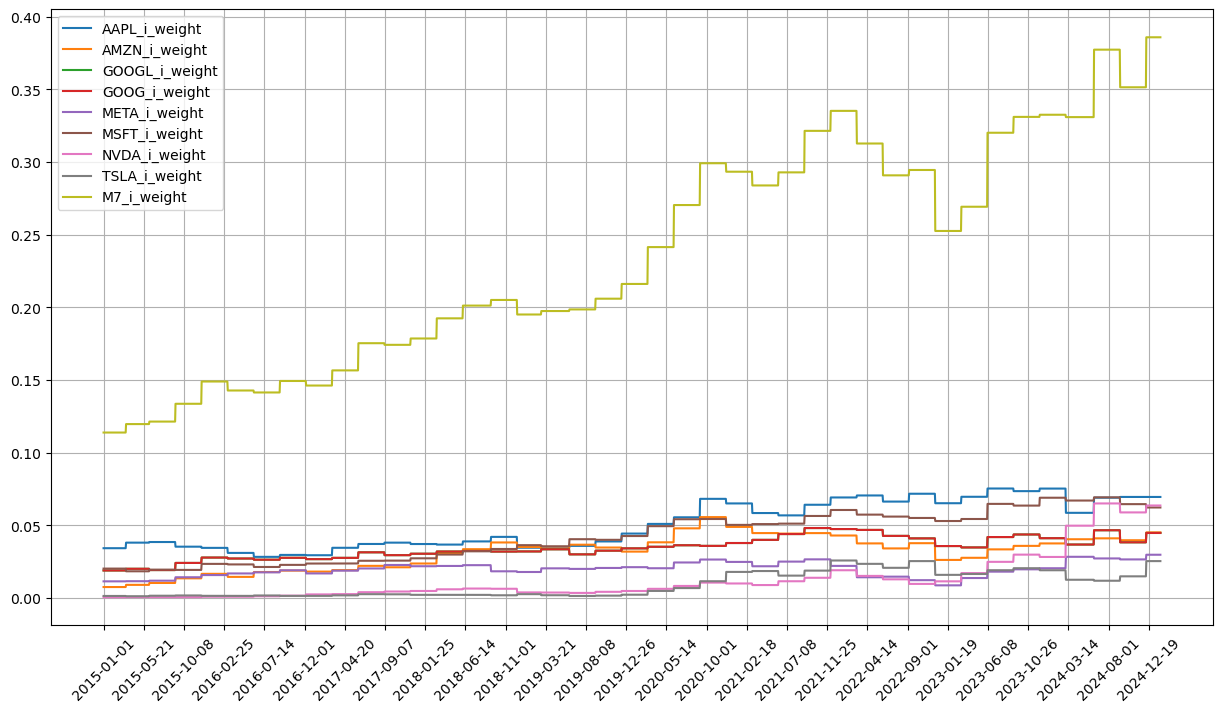

In [20]:
# Check starting point of when the weight starts varying quite strongly
plt.figure(figsize=(15, 8))

i_weight_columns = [f"{ticker}_i_weight" for ticker in ms_only] + ["M7_i_weight"]
for column in i_weight_columns:
    plt.plot(ms_df.index, ms_df[column], label=column)

plt.grid()
plt.xticks(ms_df.index[::100], rotation=45)
plt.legend();

In [22]:
# Try holding betas constant from a date onwards, to see how much weight changes have contributed to increased risk contributions
cutoff_date = "2019-01-01"

fixed_betas = ms_df.loc[cutoff_date][[f"{ticker}_beta" for ticker in ms_only]]
adj_ms_risk = []
for row in ms_df.itertuples():
    if row.Index <= cutoff_date:
        adj_ms_risk.append(row.M7_risk)

    else:
        current_risk = 0
        for ticker in ms_only:
            current_risk += getattr(row, f"{ticker}_i_weight") * fixed_betas[f"{ticker}_beta"]
        adj_ms_risk.append(current_risk)

ms_df["adj_M7_risk"] = adj_ms_risk

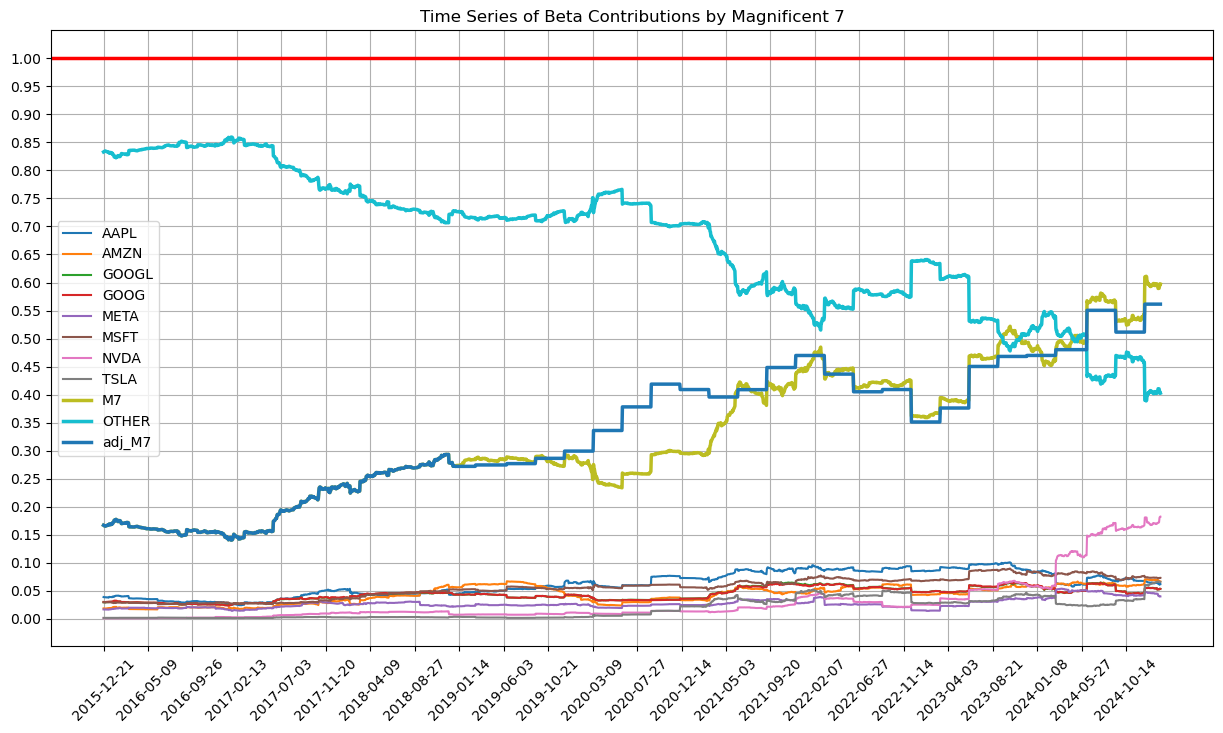

In [23]:
# Creating time-series of risk contributions while holding the betas constant from cutoff-date
plotting_tickers = ["AAPL", "AMZN", "GOOGL", "GOOG", "META", "MSFT", "NVDA", "TSLA", "M7", "OTHER", "adj_M7"]
plotting_df = ms_df[[f"{ticker}_risk" for ticker in plotting_tickers]].dropna()
plotting_df.columns = plotting_tickers

plt.figure(figsize=(15, 8))

for column in plotting_df.columns:
    if column in ["M7", "OTHER", "adj_M7"]:
        plt.plot(plotting_df.index, plotting_df[column], label=column, linewidth=2.5)
    else:
        plt.plot(plotting_df.index, plotting_df[column], label=column)
plt.axhline(y=1, color='r', linewidth=2.5)

plt.title("Time Series of Beta Contributions by Magnificent 7")
plt.xticks(plotting_df.index[::100], rotation=45)
plt.yticks([i/20 for i in range(21)])
plt.grid()
plt.legend();

Doesn't seem like there's much tracking error between the original risk against adjusted risk, other than covid period when betas deviated very drastically from the fixed levels in 2019. 

With a very significant increase of SPX being concentrated in the Mag7 over the past decade (17% to 57%), it may be viable to cluster the remaining constituents into subgroups since individual securities take up a much smaller proportion of the index than before.

In [25]:
# Load x-Mag7 data
xms_df = pd.read_csv("Data/spx_const_data.csv", index_col=0)
xms_df.drop(columns=["MRP-W_price", "MRP-W_mcap", "MRP-W_return"], inplace=True)
xms_return_df = xms_df[xms_df.columns[2::3]].copy()

xms_return_df

,A_return,ABBV_return,ABNB_return,ABT_return,ACGL_return,ACN_return,ADBE_return,ADI_return,ADM_return,ADP_return,...,WTW_return,WY_return,WYNN_return,XEL_return,XOM_return,XYL_return,YUM_return,ZBH_return,ZBRA_return,ZTS_return
2015-01-01,-1.0394,-1.2971,NaN,-1.4664,-0.8389,-0.9757,-0.5268,-0.0630,-1.6827,-0.8798,...,NaN,-1.5093,-1.6138,NaN,-0.6128,-0.9368,-0.5868,-1.0038,-1.1619,-0.7382
2015-01-02,-0.9282,0.6877,NaN,-0.2665,-1.0321,-0.5263,-0.4952,0.0360,0.0385,-0.0960,...,NaN,0.6130,-1.2571,NaN,0.4110,0.0263,-0.6863,-0.7318,0.0258,0.6507
2015-01-05,-1.8738,-1.8819,NaN,0.0223,-0.5984,-1.6884,-0.4976,-1.8275,-3.4602,-0.0720,...,NaN,0.0000,-1.7020,NaN,-2.7362,-6.2237,-2.0318,3.7303,-1.4077,-0.6003
2015-01-06,-1.5578,-0.4950,NaN,-1.1356,0.2236,-0.7213,-2.0144,-2.3384,-1.9713,-0.8350,...,NaN,-0.1108,-2.1331,NaN,-0.5316,-0.5881,-1.2274,-0.8477,-0.7205,-0.9756
2015-01-07,1.3272,4.0417,NaN,0.8108,0.5835,2.0990,0.8223,1.0516,1.5031,0.8784,...,NaN,0.3050,2.9368,NaN,1.0133,0.7887,3.3138,2.4870,2.5465,2.0643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,-0.0983,0.8688,0.5585,4.6188,-0.2038,1.1556,-0.0091,1.9056,0.2771,-0.1890,...,-0.5208,0.6048,-0.0939,-1.3735,0.5661,-0.0493,0.6259,1.1757,0.1284,0.1980
2025-01-24,-0.6625,-0.2168,-4.6157,1.4689,-0.2795,-0.2340,-0.4345,-4.8084,-0.2961,0.4395,...,1.0564,0.1670,-0.1058,0.8326,-1.3527,-0.0082,0.9842,-0.1802,-1.5435,0.9883
2025-01-27,-0.3170,3.8755,1.4714,3.5192,4.0535,2.9635,0.7396,-0.8971,3.2865,1.0266,...,2.1931,2.8676,-0.2589,2.0718,1.3897,0.5018,2.0505,1.5973,-3.6782,2.6214
2025-01-28,-0.4107,-1.1815,1.6207,-1.5761,-1.3572,1.4043,0.9667,-2.7388,-3.0286,-0.6130,...,-1.0229,-0.2593,-0.5191,-2.2945,-1.9334,-0.6875,-1.2606,-0.6395,1.5600,-1.5084


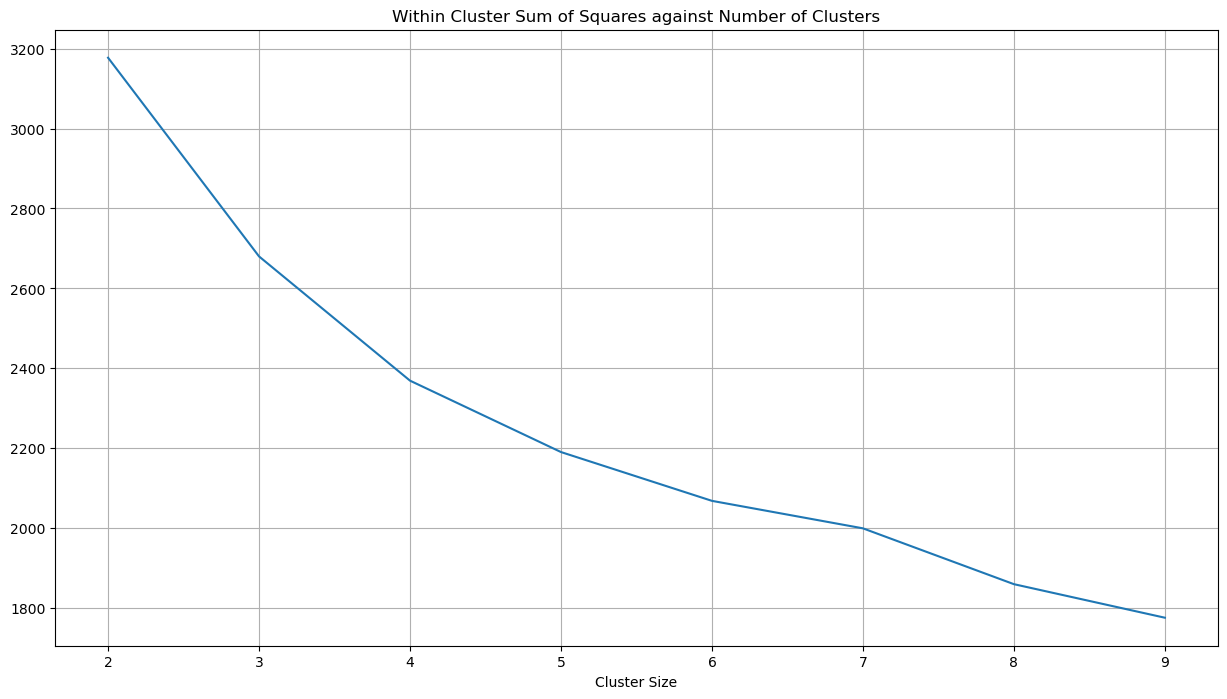

In [26]:
# Find the within cluster sum of squares for various clusters to get te optimal cluster
clustering_start = "2024-01-01"     # Cluster using correlation derived from returns data only until 2024-01-01

xms_corr = xms_return_df[clustering_start:].corr()
xms_dist = 1 - xms_corr

cluster_nums = [_ for _ in range(2, 10)]
cluster_arrays = []
cluster_scores = []
for clusters in cluster_nums:
    kmeans = KMeans(n_clusters=clusters)
    cluster_arrays.append(kmeans.fit_predict(xms_dist))
    cluster_scores.append(kmeans.inertia_)

plt.figure(figsize=(15, 8))
plt.plot(cluster_nums, cluster_scores)
plt.title("Within Cluster Sum of Squares against Number of Clusters")
plt.xlabel("Cluster Size")
plt.grid()

In [27]:
# Finding optimal cluster size
knee_locator = KneeLocator(cluster_nums, cluster_scores, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

optimal_k

4

In [28]:
# Group clusters and rank each ticker by market cap size
tickers = [ticker[:-7] for ticker in xms_return_df.columns]
final_clusters = [[] for _ in range(optimal_k)]

for ticker, cluster in zip(tickers, cluster_arrays[2]):
    final_clusters[cluster].append(ticker)

xms_mcaps = xms_df[xms_df.columns[1::3]].iloc[-1].copy()
xms_rankings = [ticker[:-5] for ticker in xms_mcaps.sort_values(ascending=False).index]
ranking_dict = {ticker: rank for rank, ticker in enumerate(xms_rankings)}

for cluster in range(len(final_clusters)):
    final_clusters[cluster] = sorted(final_clusters[cluster], key=lambda x: ranking_dict.get(x))

final_clusters

[['BRK/B',
  'JPM',
  'V',
  'MA',
  'HD',
  'BAC',
  'WFC',
  'CSCO',
  'BX',
  'MS',
  'AXP',
  'TMO',
  'IBM',
  'LIN',
  'GS',
  'CAT',
  'SPGI',
  'BLK',
  'C',
  'UNP',
  'SCHW',
  'LOW',
  'KKR',
  'HON',
  'TJX',
  'DE',
  'ADP',
  'FI',
  'PLD',
  'SHW',
  'ICE',
  'MCO',
  'PYPL',
  'PH',
  'PNC',
  'CTAS',
  'MAR',
  'COF',
  'ITW',
  'USB',
  'EMR',
  'GD',
  'CSX',
  'TFC',
  'BK',
  'HLT',
  'KMI',
  'MET',
  'NSC',
  'ROP',
  'OKE',
  'CARR',
  'PCAR',
  'SLB',
  'SPG',
  'AMP',
  'CPRT',
  'GWW',
  'PAYX',
  'DFS',
  'JCI',
  'URI',
  'GM',
  'CMI',
  'AIG',
  'NDAQ',
  'DHI',
  'CTVA',
  'PRU',
  'CBRE',
  'FIS',
  'BKR',
  'FAST',
  'A',
  'IT',
  'F',
  'CTSH',
  'ODFL',
  'OTIS',
  'IR',
  'VMC',
  'IQV',
  'WAB',
  'RJF',
  'LEN',
  'EFX',
  'MTB',
  'HIG',
  'LYV',
  'MLM',
  'DD',
  'ROK',
  'CSGP',
  'TSCO',
  'NUE',
  'FITB',
  'STT',
  'XYL',
  'DOW',
  'PPG',
  'GPN',
  'SW',
  'FTV',
  'MTD',
  'BR',
  'DOV',
  'SYF',
  'CPAY',
  'VLTO',
  'TROW',
  'LYB',
 

We now create a market-cap weighted portfolio (using loose SPX rebalancing) of each cluster, to get their historical market cap and returns. This allows us to calculate the risk contributions of each cluster to the SPX

In [39]:
# Building cluster portfolios and getting their historical mcaps and returns
cluster_dict = {}
for index, cluster in enumerate(final_clusters):
    cluster_columns = []
    for ticker in cluster:
        cluster_columns.append(f"{ticker}_mcap")
        cluster_columns.append(f"{ticker}_return")
    
    cluster_df = xms_df[cluster_columns].copy()
    cluster_df.fillna(0, inplace=True)
    cluster_df["cluster_mcap"] = cluster_df[[f"{ticker}_mcap" for ticker in cluster]].sum(axis=1)

    weight_columns = {}
    for ticker in cluster:
        weight_columns[f"{ticker}_weight"] = cluster_df[f"{ticker}_mcap"] / cluster_df[f"cluster_mcap"]
    cluster_df = pd.concat([cluster_df, pd.DataFrame(weight_columns)], axis=1)

    index_weights = {ticker: [] for ticker in cluster}
    cluster_return = []
    existing_weights = {ticker: cluster_df.iloc[0][f"{ticker}_weight"] for ticker in cluster}
    temp_weights = {ticker: 0 for ticker in cluster}
    for date, row in cluster_df.iterrows():
        running_return = 0
        if date in ref_dates:
            for ticker in cluster:
                temp_weights[ticker] = row[f"{ticker}_weight"]

        if date in update_dates:
                existing_weights = temp_weights

        for ticker in cluster:
            index_weights[ticker].append(existing_weights[ticker])
            running_return += existing_weights[ticker] * row[f"{ticker}_return"]
        
        cluster_return.append(running_return)

    cluster_df = pd.concat([cluster_df, pd.DataFrame({f"{ticker}_i_weight": i_weights for ticker, i_weights in index_weights.items()}, index=cluster_df.index)], axis=1)
    cluster_df["cluster_return"] = cluster_return

    cluster_dict[f"c{index}_return"] = cluster_df["cluster_return"].values
    cluster_dict[f"c{index}_mcap"] = cluster_df["cluster_mcap"].values

cluster_dict

{'c0_return': array([-0.93411963, -0.06814665, -2.39040839, ...,  0.66062938,
        -0.43064738,  0.37853804]),
 'c0_mcap': array([ 5199750.6378,  5195302.5617,  5071179.2574, ..., 12672790.1354,
        12611292.829 , 12659864.5154]),
 'c1_return': array([-0.92358289,  0.02633271, -1.6051197 , ...,  1.57813686,
        -0.50727592,  0.32320086]),
 'c1_mcap': array([ 5458881.7779    ,  5459895.1158    ,  5370912.4704    , ...,
        11051193.85120001, 10995999.7003    , 11028490.3785    ]),
 'c2_return': array([-1.33319263,  0.17459058, -0.62102935, ...,  2.83869419,
        -1.82262402,  0.26421065]),
 'c2_mcap': array([2825242.6469, 2830244.1897, 2812643.2888, ..., 5145925.338 ,
        5052201.0163, 5065986.7884]),
 'c3_return': array([-0.89111039, -0.27362452, -1.70811648, ..., -5.3382983 ,
         1.24151333, -0.09066692]),
 'c3_mcap': array([1840590.4279, 1837502.1304, 1806203.8722, ..., 8001629.0425,
        8102595.8463, 8093146.445 ])}

In [40]:
spx_cluster_df = ms_df[["SPX_mcap", "SPX_return", "M7_risk"]].copy()
spx_cluster_df = pd.concat([spx_cluster_df, pd.DataFrame(cluster_dict, index=spx_cluster_df.index)], axis=1)
for i in range(optimal_k):
    spx_cluster_df[f"c{i}_weight"] = spx_cluster_df[f"c{i}_mcap"] / spx_cluster_df["SPX_mcap"]
spx_cluster_df.reset_index(drop=True, inplace=True)

cluster_tickers = [f"c{i}" for i in range(optimal_k)]
cov_columns = [f"{ticker}_return" for ticker in cluster_tickers] + ["SPX_return"]
cluster_betas = {ticker: [] for ticker in cluster_tickers}

window_size = 252   # 1-year rolling window (approx)
for row in spx_cluster_df.itertuples():
    if row.Index < window_size:
        for ticker in cluster_tickers:
            cluster_betas[ticker].append(np.nan)
        continue

    beta_df = spx_cluster_df[row.Index - window_size:row.Index + 1]
    beta_df = beta_df[cov_columns]
    cov_vector = beta_df.cov()["SPX_return"]
    spx_var = cov_vector.pop("SPX_return")
    cov_vector /= spx_var

    for ticker, beta in cov_vector.items():
        cluster_betas[ticker[:-7]].append(beta)

for ticker, beta_ts in cluster_betas.items():
    spx_cluster_df[f"{ticker}_beta"] = beta_ts

spx_cluster_df

,SPX_mcap,SPX_return,M7_risk,c0_return,c0_mcap,c1_return,c1_mcap,c2_return,c2_mcap,c3_return,c3_mcap,c0_weight,c1_weight,c2_weight,c3_weight,c0_beta,c1_beta,c2_beta,c3_beta
0,18845822.34,-1.03,0.000000,-0.934120,5.199751e+06,-0.923583,5.458882e+06,-1.333193,2.825243e+06,-0.891110,1.840590e+06,0.275910,0.289660,0.149913,0.097666,NaN,NaN,NaN,NaN
1,18840128.85,-0.03,0.000000,-0.068147,5.195303e+06,0.026333,5.459895e+06,0.174591,2.830244e+06,-0.273625,1.837502e+06,0.275757,0.289801,0.150224,0.097531,NaN,NaN,NaN,NaN
2,18497686.83,-1.83,0.000000,-2.390408,5.071179e+06,-1.605120,5.370912e+06,-0.621029,2.812643e+06,-1.708116,1.806204e+06,0.274152,0.290356,0.152054,0.097645,NaN,NaN,NaN,NaN
3,18333610.15,-0.89,0.000000,-1.420364,4.999153e+06,-0.511209,5.342820e+06,0.081159,2.815069e+06,-1.487921,1.779209e+06,0.272677,0.291422,0.153547,0.097046,NaN,NaN,NaN,NaN
4,18549992.79,1.16,0.000000,1.119625,5.055917e+06,1.461067,5.422782e+06,1.049395,2.844689e+06,0.848784,1.794420e+06,0.272556,0.292333,0.153353,0.096734,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,53943854.69,0.53,0.589518,0.766456,1.259031e+07,0.775079,1.087128e+07,0.578651,4.968922e+06,0.627334,8.588973e+06,0.233397,0.201530,0.092113,0.159221,0.798975,0.455662,0.135653,1.593706
2626,53800552.64,-0.29,0.589641,0.015736,1.259358e+07,0.115479,1.088242e+07,0.681259,5.003823e+06,-0.857176,8.519950e+06,0.234079,0.202273,0.093007,0.158362,0.798042,0.454561,0.133606,1.595414
2627,53016057.50,-1.46,0.594086,0.660629,1.267279e+07,1.578137,1.105119e+07,2.838694,5.145925e+06,-5.338298,8.001629e+06,0.239037,0.208450,0.097064,0.150928,0.781422,0.433215,0.106352,1.623176
2628,53490109.97,0.92,0.597737,-0.430647,1.261129e+07,-0.507276,1.099600e+07,-1.822624,5.052201e+06,1.241513,8.102596e+06,0.235769,0.205571,0.094451,0.151478,0.775458,0.428685,0.096423,1.622314


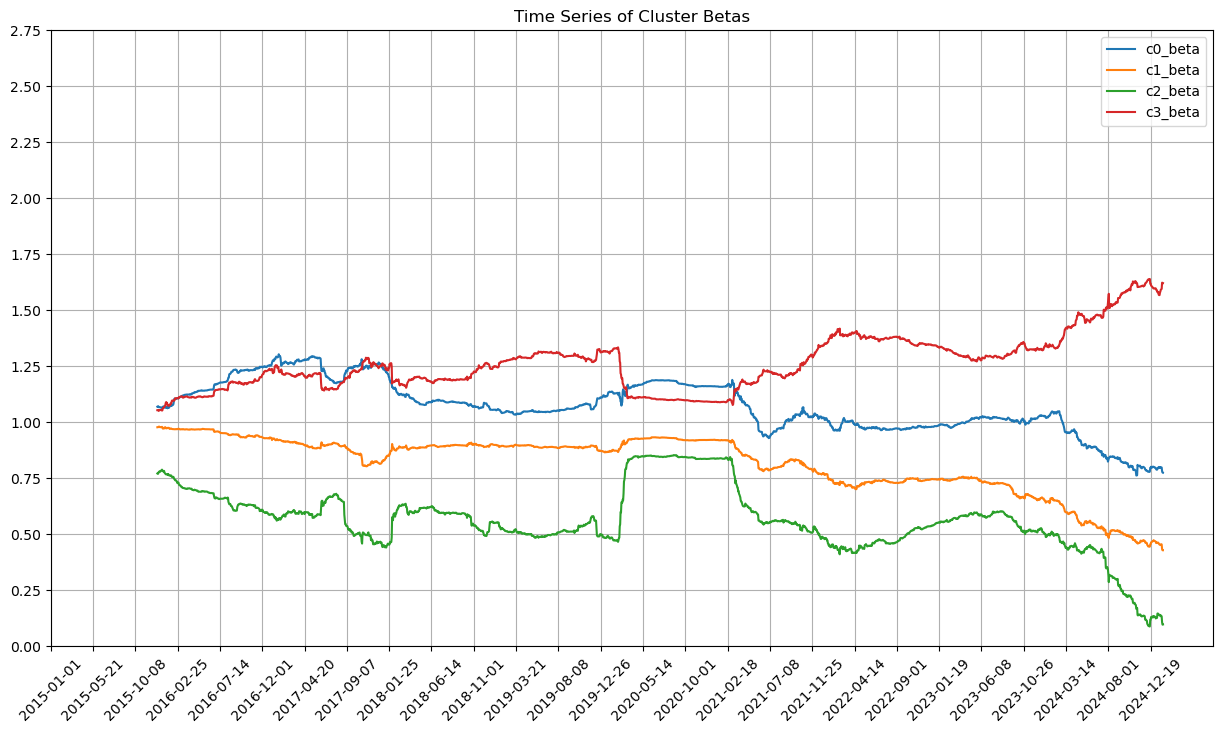

In [42]:
# Plotting beta time-series of clusters
plotting_df = spx_cluster_df[[f"{ticker}_beta" for ticker in cluster_tickers]]
plotting_df.index = ms_df.index

plt.figure(figsize=(15, 8))

for column in plotting_df.columns:
    plt.plot(plotting_df.index, plotting_df[column], label=column)

plt.title("Time Series of Cluster Betas")
plt.xticks(plotting_df.index[::100], rotation=45)
plt.yticks([i/4 for i in range(8)])
plt.grid()
plt.legend();

Initial clusters are relatively centered around 1 (implying that they were similarly representative of the wider market). There was also a drastic move approximately during covid, maybe even before? But most notably, there have been strong trends in beta movements in each cluster over the past year. I think that these subgroups most probably represent specific sectors, and their betas are getting more extreme as it no longer represents their relationship with the wider market, but with the Mag7 Big Tech business.

In [43]:
# Compute index weights of each cluster and find their risk contributions
cluster_weights = {ticker: [] for ticker in cluster_tickers}
spx_cluster_df.index = ms_df.index

existing_weights = {ticker: spx_cluster_df.iloc[0][f"{ticker}_weight"] for ticker in cluster_tickers}
temp_weights = {ticker: 0 for ticker in cluster_tickers}
for row in spx_cluster_df.itertuples():
    if row.Index in ref_dates:
        for ticker in cluster_tickers:
            temp_weights[ticker] = getattr(row, f"{ticker}_weight")

    if row.Index in update_dates:
        existing_weights = temp_weights

    for ticker in cluster_tickers:
        cluster_weights[ticker].append(existing_weights[ticker])

for ticker, index_weight in cluster_weights.items():
    spx_cluster_df[f"{ticker}_i_weight"] = index_weight

for ticker in cluster_tickers:
    spx_cluster_df[f"{ticker}_risk"] = spx_cluster_df[f"{ticker}_i_weight"] * spx_cluster_df[f"{ticker}_beta"]

spx_cluster_df["total_cluster_risk"] = spx_cluster_df[[f"{name}_risk" for name in cluster_tickers]].sum(axis=1)

spx_cluster_df

,SPX_mcap,SPX_return,M7_risk,c0_return,c0_mcap,c1_return,c1_mcap,c2_return,c2_mcap,c3_return,...,c3_beta,c0_i_weight,c1_i_weight,c2_i_weight,c3_i_weight,c0_risk,c1_risk,c2_risk,c3_risk,total_cluster_risk
2015-01-01,18845822.34,-1.03,0.000000,-0.934120,5.199751e+06,-0.923583,5.458882e+06,-1.333193,2.825243e+06,-0.891110,...,NaN,0.275910,0.289660,0.149913,0.097666,NaN,NaN,NaN,NaN,0.000000
2015-01-02,18840128.85,-0.03,0.000000,-0.068147,5.195303e+06,0.026333,5.459895e+06,0.174591,2.830244e+06,-0.273625,...,NaN,0.275910,0.289660,0.149913,0.097666,NaN,NaN,NaN,NaN,0.000000
2015-01-05,18497686.83,-1.83,0.000000,-2.390408,5.071179e+06,-1.605120,5.370912e+06,-0.621029,2.812643e+06,-1.708116,...,NaN,0.275910,0.289660,0.149913,0.097666,NaN,NaN,NaN,NaN,0.000000
2015-01-06,18333610.15,-0.89,0.000000,-1.420364,4.999153e+06,-0.511209,5.342820e+06,0.081159,2.815069e+06,-1.487921,...,NaN,0.275910,0.289660,0.149913,0.097666,NaN,NaN,NaN,NaN,0.000000
2015-01-07,18549992.79,1.16,0.000000,1.119625,5.055917e+06,1.461067,5.422782e+06,1.049395,2.844689e+06,0.848784,...,NaN,0.275910,0.289660,0.149913,0.097666,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,53943854.69,0.53,0.589518,0.766456,1.259031e+07,0.775079,1.087128e+07,0.578651,4.968922e+06,0.627334,...,1.593706,0.232081,0.204258,0.095457,0.152241,0.185427,0.093073,0.012949,0.242627,0.534076
2025-01-24,53800552.64,-0.29,0.589641,0.015736,1.259358e+07,0.115479,1.088242e+07,0.681259,5.003823e+06,-0.857176,...,1.595414,0.232081,0.204258,0.095457,0.152241,0.185210,0.092848,0.012754,0.242887,0.533699
2025-01-27,53016057.50,-1.46,0.594086,0.660629,1.267279e+07,1.578137,1.105119e+07,2.838694,5.145925e+06,-5.338298,...,1.623176,0.232081,0.204258,0.095457,0.152241,0.181353,0.088488,0.010152,0.247114,0.527107
2025-01-28,53490109.97,0.92,0.597737,-0.430647,1.261129e+07,-0.507276,1.099600e+07,-1.822624,5.052201e+06,1.241513,...,1.622314,0.232081,0.204258,0.095457,0.152241,0.179969,0.087562,0.009204,0.246982,0.523718


Some tracking error between the risk contributions of all clusters here against the risk contributions of the OTHER group calculated from the M7 case, but should just be due to approximations in index calculation

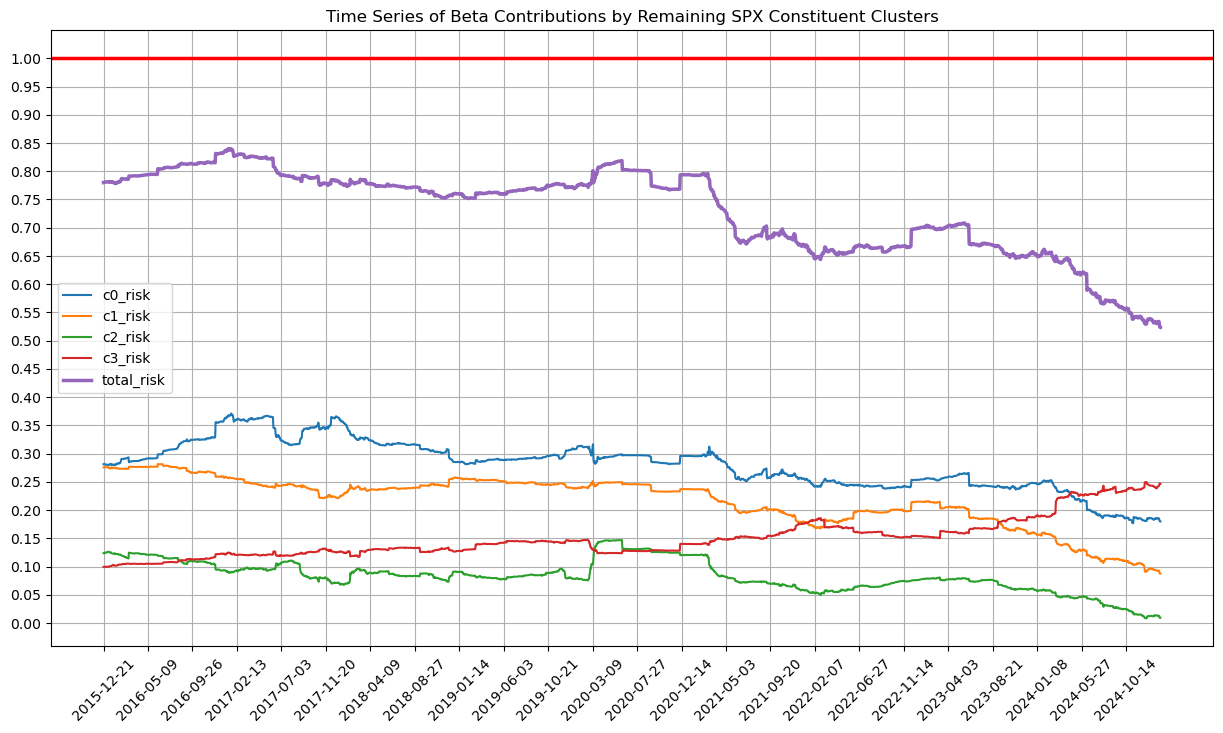

In [45]:
# Creating time-series of risk contributions while holding the betas constant from cutoff-date
plotting_df = spx_cluster_df[[f"{ticker}_risk" for ticker in cluster_tickers] + ["total_cluster_risk"]].dropna()
plotting_df.columns = cluster_tickers + ["total"]

plt.figure(figsize=(15, 8))

for column in plotting_df.columns:
    if column in "total":
        plt.plot(plotting_df.index, plotting_df[column], label=f"{column}_risk", linewidth=2.5)
    else:
        plt.plot(plotting_df.index, plotting_df[column], label=f"{column}_risk")
plt.axhline(y=1, color='r', linewidth=2.5)

plt.title("Time Series of Beta Contributions by Remaining SPX Constituent Clusters")
plt.xticks(plotting_df.index[::100], rotation=45)
plt.yticks([i/20 for i in range(21)])
plt.grid()
plt.legend();

#### How does this affect the use of beta for evaluating/forecasting returns and the use of beta for investment decisions?

In [ ]:
# Build Dataframe consisting of Mag7 stocks and cluster beta and returns
lr_df = ms_df[[f"{ticker}_beta" for ticker in ms_only]].copy()
lr_df[[f"{ticker}_return" for ticker in ms_only]] = ms_df[[f"{ticker}_return" for ticker in ms_only]]
lr_df[[f"{ticker}_beta" for ticker in cluster_tickers]] = spx_cluster_df[[f"{ticker}_beta" for ticker in cluster_tickers]]
lr_df[[f"{ticker}_return" for ticker in cluster_tickers]] = spx_cluster_df[[f"{ticker}_return" for ticker in cluster_tickers]]
lr_df.dropna(inplace=True)

lr_df

,AAPL_beta,AMZN_beta,GOOGL_beta,GOOG_beta,META_beta,MSFT_beta,NVDA_beta,TSLA_beta,AAPL_return,AMZN_return,...,NVDA_return,TSLA_return,c0_beta,c1_beta,c2_beta,c3_beta,c0_return,c1_return,c2_return,c3_return
2015-12-21,1.126494,1.117395,1.065295,1.083106,1.067496,1.258877,1.186588,1.142842,1.2261,0.0557,...,2.3491,0.9112,1.069612,0.977810,0.771464,1.053875,0.976534,0.643379,0.593666,0.913414
2015-12-22,1.119323,1.115392,1.064645,1.080976,1.063787,1.258051,1.179913,1.139671,-0.0932,-0.2047,...,0.1064,-1.1223,1.070962,0.978354,0.769857,1.053680,1.075357,0.917445,0.881337,0.629070
2015-12-23,1.118673,1.106936,1.057950,1.073471,1.052154,1.254128,1.173303,1.131225,1.2870,0.0829,...,0.3796,-0.1087,1.071899,0.978097,0.770475,1.052533,1.494490,1.164069,1.076068,1.079614
2015-12-24,1.112945,1.104432,1.057232,1.071536,1.053368,1.264277,1.174995,1.113663,-0.5340,-0.1371,...,0.3479,0.3788,1.068701,0.979538,0.776580,1.054140,-0.190593,-0.191476,-0.161056,0.038563
2015-12-25,1.117027,1.098428,1.051048,1.065911,1.051013,1.262860,1.166350,1.118913,-0.5340,-0.1371,...,0.3479,0.3788,1.066966,0.980939,0.779555,1.051912,-0.190593,-0.191476,-0.161056,0.038563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,0.915099,1.504005,1.175511,1.176837,1.386592,1.168182,2.696162,2.603316,-0.0760,0.1745,...,0.1020,-0.6577,0.798975,0.455662,0.135653,1.593706,0.766456,0.775079,0.578651,0.627334
2025-01-24,0.914841,1.504388,1.172046,1.173255,1.382531,1.168827,2.703979,2.604201,-0.3935,-0.2421,...,-3.1246,-1.4065,0.798042,0.454561,0.133606,1.595414,0.015736,0.115479,0.681259,-0.857176
2025-01-27,0.875086,1.483369,1.195727,1.195895,1.336016,1.166864,2.826309,2.596389,3.1780,0.2427,...,-16.9682,-2.3193,0.781422,0.433215,0.106352,1.623176,0.660629,1.578137,2.838694,-5.338298
2025-01-28,0.889200,1.482114,1.199288,1.198885,1.340733,1.176434,2.857540,2.584734,3.6544,1.1596,...,8.9259,0.2367,0.775458,0.428685,0.096423,1.622314,-0.430647,-0.507276,-1.822624,1.241513


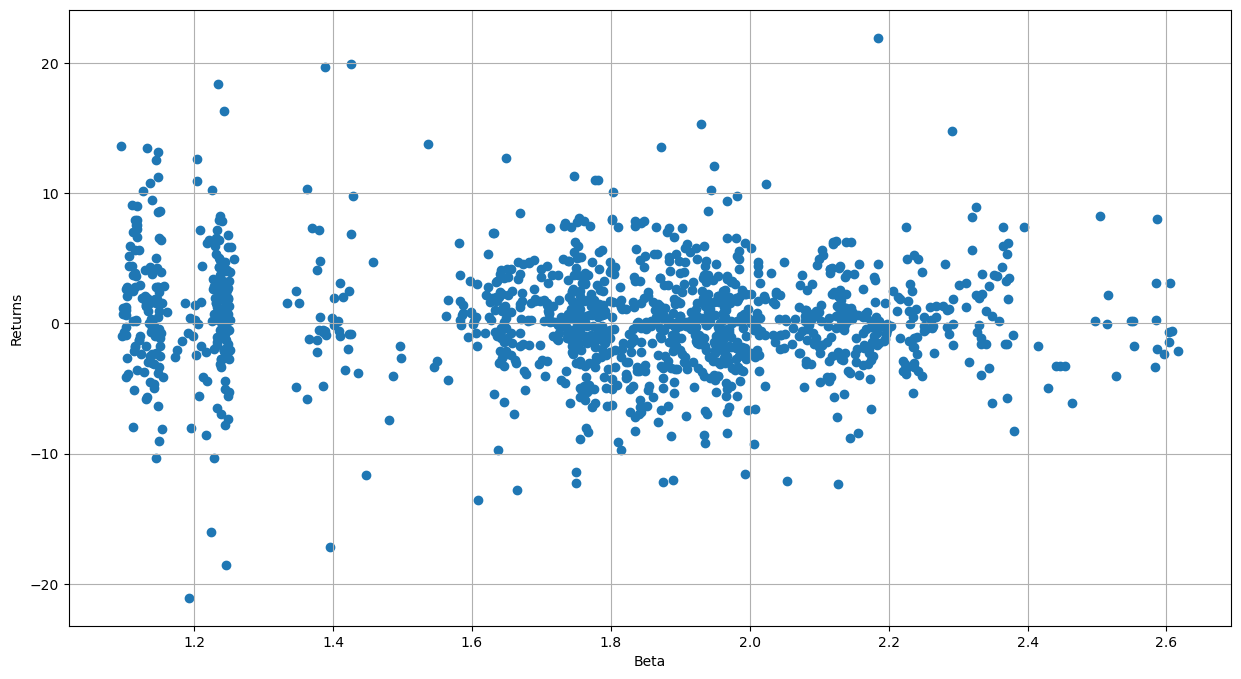

In [ ]:
ticker_of_interest = "TSLA"
start_date = "2020-01-01"
end_date = None
plotting_df = lr_df.copy()

if start_date:
    plotting_df = plotting_df[start_date:]
if end_date:
    plotting_df = plotting_df[:end_date]

plt.figure(figsize=(15, 8))
plt.scatter(plotting_df[f"{ticker_of_interest}_beta"], plotting_df[f"{ticker_of_interest}_return"])
plt.xlabel("Beta")
plt.ylabel("Returns")
plt.grid()

In [48]:
temp_df = lr_df.copy()
start_date = "2020-01-01"
end_date = None

if start_date:
    temp_df = temp_df[start_date:]
if end_date:
    temp_df = temp_df[:end_date]

results = {}
for ticker in ms_only:
        X = sm.add_constant(temp_df[f"{ticker}_beta"])
        y = temp_df[f"{ticker}_return"]

        model = sm.OLS(y, X).fit()
        results[ticker] = {
            'slope': model.params[f"{ticker}_beta"],
            'intercept': model.params['const'],
            'r_squared': model.rsquared,
            'p_value': model.pvalues[f"{ticker}_beta"]
        }
for ticker in cluster_tickers:
        X = sm.add_constant(temp_df[f"{ticker}_beta"])
        y = temp_df[f"{ticker}_return"]

        model = sm.OLS(y, X).fit()
        results[ticker] = {
            'slope': model.params[f"{ticker}_beta"],
            'intercept': model.params['const'],
            'r_squared': model.rsquared,
            'p_value': model.pvalues[f"{ticker}_beta"]
        }

results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

          slope  intercept  r_squared   p_value
AAPL  -0.141266   0.287248   0.000111  0.701955
AMZN  -0.049440   0.174723   0.000064  0.770678
GOOGL -0.337406   0.532520   0.000701  0.335501
GOOG  -0.318766   0.508006   0.000663  0.348872
META  -0.067818   0.234246   0.000059  0.779646
MSFT  -0.069335   0.190987   0.000009  0.914326
NVDA  -0.264433   0.833581   0.001130  0.221149
TSLA  -0.871625   1.869227   0.005595  0.006429
c0     0.288548  -0.228317   0.000403  0.465023
c1     0.112394  -0.039803   0.000175  0.630552
c2     0.120928  -0.040904   0.000395  0.469848
c3    -0.369537   0.578844   0.000921  0.269487
